# HOUSE PRICE PREDICTION ML PROJECTS

In [2]:
# importing the dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

In [3]:
!pip install xgboost

In [4]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn.datasets import fetch_california_housing

In [6]:
house_price_dataset = fetch_california_housing()
# Access the data and target
X = house_price_dataset.data
y = house_price_dataset.target

In [7]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [8]:
# loading the datasets to a pandas Datafrme
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [9]:
# print first five 5 rows in dataframe
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
# add the target colunms to the DataFrame
house_price_dataframe['price'] = house_price_dataset.target

In [12]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
# checking the number of rows and columns in Data frame
house_price_dataframe.shape

(20640, 9)

In [14]:
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [15]:
# statisrical measure of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [16]:
# understanding the correlations bewtween two various feature in the datasets
# 1 . positive corelations and negative correlations

In [17]:
correlation = house_price_dataframe.corr()

<Axes: >

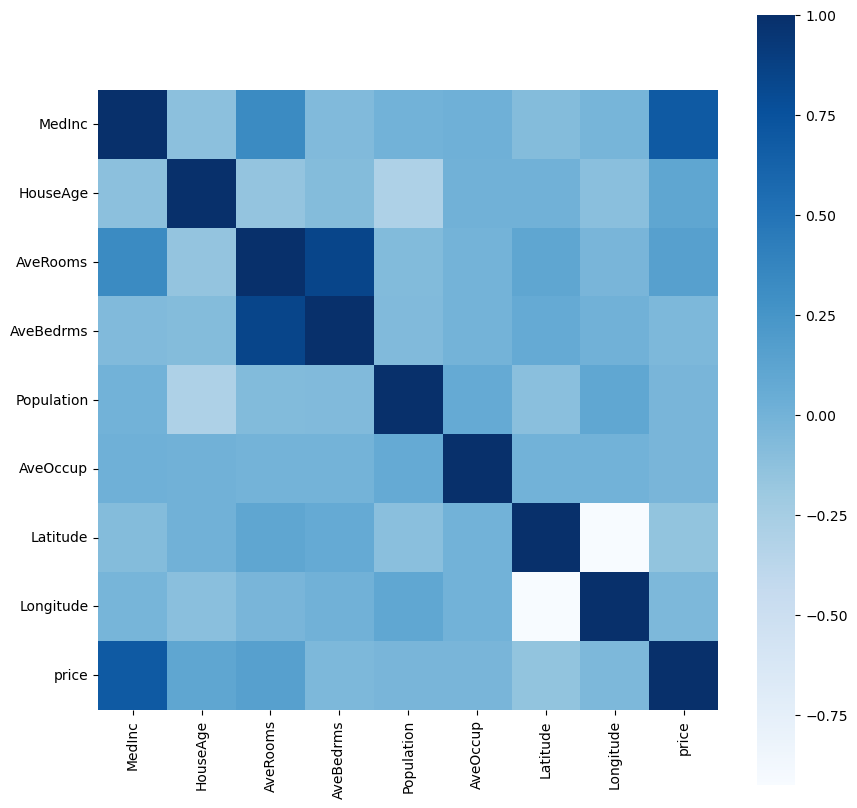

In [18]:
# constructing a heapmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.lf',annot_kws={'size':8}, cmap='Blues')

In [19]:
# spliting the data and target

In [20]:
x = house_price_dataframe.drop(['price'],axis=1)
y = house_price_dataframe['price']

In [21]:
print(x)
print(y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [22]:
# spltting the data training data into testing data

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =2)

In [24]:
print(x.shape, x_train.shape, x_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [25]:
# model training
# XGBoot regresssor

In [26]:
# loading the model
model = XGBRegressor()

In [27]:
# trainign the model withe x_train
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [28]:
# Evaluations
# predictions on training Data

In [49]:
# Assuming your model is already trained and named 'model'
training_data_prediction = model.predict(x_train)

In [51]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [53]:
# R square eror
score_1  = metrics.r2_score(y_train, training_data_prediction)

# mean absolute error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R square error:", score_1)
print('Mean absolute error:',score_2)

R square error: 0.943650140819218
Mean absolute error: 0.1933648700612105


In [55]:
# predictions on test data
test_data_prediction = model.predict(x_text)

NameError: name 'x_text' is not defined

In [57]:
# R square eror
score_1  = metrics.r2_score(y_test, test_data_prediction)

# mean absolute error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R square error:", score_1)
print('Mean absolute error:',score_2)

NameError: name 'test_data_prediction' is not defined

In [59]:
# Visualize the actual price and oredited prices

Text(0.5, 1.0, 'Actual Price vs Predicted Price')

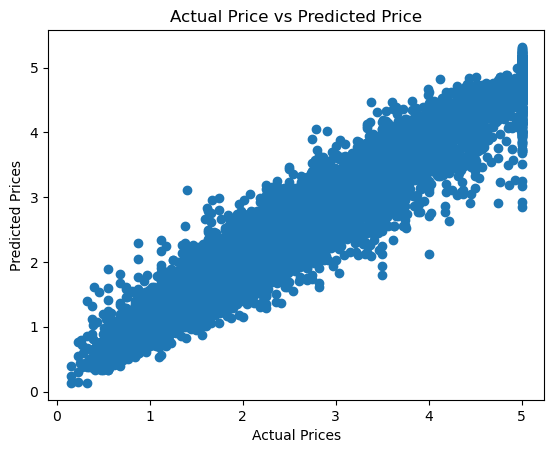

In [61]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
